# Principal Component Analysis (PCA)

PCA is a method that transforms a set of possibly correlated variables into a smaller number of uncorrelated variables called principal components. These principal components capture the most variance (information) in the data with fewer variables.

## Steps in PCA

1. **Standardizing the Data**: Often, the first step in PCA is to standardize the data so that each feature contributes equally. This involves subtracting the mean and dividing by the standard deviation for each feature.


2. **Covariance Matrix Computation**: PCA computes the covariance matrix of the data to understand how the variables in the dataset are varying from the mean with respect to each other.

3. **Eigendecomposition**: The next step is to compute the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors determine the directions of the new feature space, and eigenvalues determine their magnitude. In other words, the eigenvectors point in the direction of maximum variance.

4. **Sorting and Selecting Principal Components**: Eigenvectors are sorted by their eigenvalues in descending order to rank the corresponding principal components in terms of the variance they capture in the data. Typically, only the top few eigenvectors are kept. These form the new feature subspace.

5. **Projection**: Finally, the original data is projected onto the new feature subspace using the selected eigenvectors. This results in a new dataset with reduced dimensions.

## Benefits of PCA

- **Reduction of Dimensionality**: PCA reduces the number of features while retaining most of the important information (variance). This simplifies the model, reducing the computational and storage burden.
- **Noise Reduction**: By eliminating the components with lower variance and retaining those with higher variance, PCA can help in noise reduction.
- **Improved Visualization**: With fewer variables, it becomes feasible to visualize high-dimensional data in two or three dimensions.
- **Feature Correlation**: Helps in understanding the interrelationships in high-dimensional data by transforming them into principal components that are independent of one another.

## Drawbacks of PCA

- **Variance-Centric**: PCA focuses on maximizing variance, which may not always equate to capturing the most important information. Some important variables may have low variance and could be ignored.
- **Linear Assumptions**: PCA assumes that the principal components are a linear combination of the original features, which may not hold in cases where there are complex non-linear relationships.
- **Sensitive to Scaling**: Since PCA is affected by the scale of the variables, different results can be obtained depending on how the data is scaled (e.g., normalization or standardization).
- **Loss of Meaning**: The principal components are linear combinations of the original variables and may not be interpretable in a meaningful way in terms of the original data.
- **Outliers**: PCA is sensitive to outliers, which can disproportionately influence the results since they can significantly affect the mean and covariance structure.

## When to Use PCA

PCA is typically used in situations where you need to mitigate issues arising from high-dimensional data in machine learning, such as overfitting and high computational costs. It's also used for exploratory data analysis to identify underlying structures in the data.

## PCA using PyTorch


### 1. Standardizing the Data

Standardizing the data is a crucial preprocessing step in PCA to ensure that each feature contributes equally to the analysis. Standardizing (or normalizing) the data means adjusting the values to have a mean of zero and a standard deviation of one. This is important because PCA is sensitive to the variances of the features, and without standardizing, features with larger scales can dominate the principal components.

#### Mathematical Explanation of Standardizing
The standardization of a dataset is done using the following formula:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $ z $ is the standardized value.
- $ x $ is the original value.
- $ \mu $ is the mean of the feature.
- $ \sigma $ is the standard deviation of the feature.

#### Example

Let's take a simple dataset with 2 features and 3 samples:

$$ X = \begin{bmatrix} 2 & 20 \\ 4 & 40 \\ 6 & 60 \end{bmatrix} $$

1. Compute the Mean ($\mu$):
   - Mean of Feature 1: $\mu_1 = \frac{2 + 4 + 6}{3} = 4$
   - Mean of Feature 2: $\mu_2 = \frac{20 + 40 + 60}{3} = 40$

2. Compute the Standard Deviation ($\sigma$):
   - Standard Deviation of Feature 1:
  
     $$
     \sigma_1 = \sqrt{\frac{(2-4)^2 + (4-4)^2 + (6-4)^2}{3}} = \sqrt{\frac{4 + 0 + 4}{3}} = \sqrt{2.67} \approx 1.63
     $$

   - Standard Deviation of Feature 2:
  
     $$
     \sigma_2 = \sqrt{\frac{(20-40)^2 + (40-40)^2 + (60-40)^2}{3}} = \sqrt{\frac{400 + 0 + 400}{3}} = \sqrt{267} \approx 16.33
     $$

3. Standardize the Data:
   Using the formula $ z = \frac{x - \mu}{\sigma} $, we standardize each feature:

   - Standardized Feature 1:
  
     $$
     z_1 = \begin{bmatrix} \frac{2 - 4}{1.63} \\ \frac{4 - 4}{1.63} \\ \frac{6 - 4}{1.63} \end{bmatrix} = \begin{bmatrix} -1.23 \\ 0 \\ 1.23 \end{bmatrix}
     $$

   - Standardized Feature 2:

     $$
     z_2 = \begin{bmatrix} \frac{20 - 40}{16.33} \\ \frac{40 - 40}{16.33} \\ \frac{60 - 40}{16.33} \end{bmatrix} = \begin{bmatrix} -1.23 \\ 0 \\ 1.23 \end{bmatrix}
     $$

   So, the standardized dataset is:

   $$
   Z = \begin{bmatrix} -1.23 & -1.23 \\ 0 & 0 \\ 1.23 & 1.23 \end{bmatrix}
   $$

 Why Standardize the Data?

1. Equal Contribution of Features: Features with larger scales can dominate the PCA results if not standardized. By standardizing, each feature contributes equally to the analysis.

2. Improved Performance: PCA relies on the covariance matrix, which is affected by the scales of the features. Standardizing ensures that all features are on the same scale, leading to better and more meaningful principal components.

3. Interpretability: Standardized features have a mean of zero and a standard deviation of one, making the results of PCA easier to interpret.

**Visualizing the Standardization Process**

Let's visualize the original and standardized data to better understand the impact of standardization:

1. **Original Data**:
   - The scatter plot shows the original data points with features on different scales. The red dashed lines represent the mean of each feature.

2. **Standardized Data**:
   - The scatter plot shows the standardized data points. Here, both features have been transformed to have a mean of zero and a standard deviation of one. The red dashed lines at zero indicate the mean.


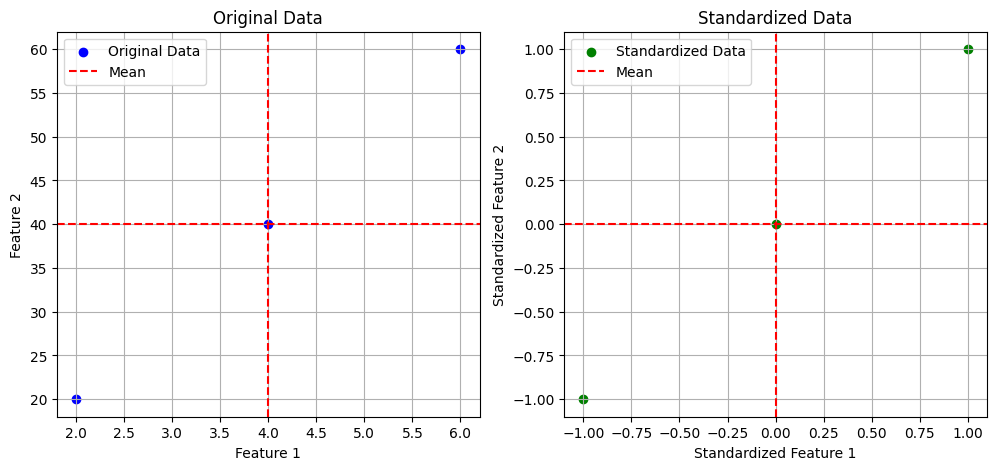

In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def standardize(X):
    """
    standardize features using standard scaler
    :param X: input data with shape m (# of observations) X n (# of features)
    :return: standardized features
    """
    X = torch.tensor(X, dtype=torch.float32)
    return (X - torch.mean(X, dim=0)) / torch.std(X, dim=0)

# Original data
X = np.array([[2, 20], [4, 40], [6, 60]])

# Standardizing the data
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

X_std_torch = standardize(X)
X_std = X_std_torch.numpy()

# Plotting the original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.axhline(y=np.mean(X[:, 1]), color='r', linestyle='--', label='Mean')
plt.axvline(x=np.mean(X[:, 0]), color='r', linestyle='--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plotting the standardized data
plt.subplot(1, 2, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], color='green', label='Standardized Data')
plt.axhline(y=0, color='r', linestyle='--', label='Mean')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.title('Standardized Data')
plt.legend()
plt.grid(True)

plt.show()

### 2. Covariance Matrix Computation
The covariance matrix is a measure of how much each of the features in the dataset varies with each other.
Covariance is a measure of how much two random variables vary together. For a dataset with $n$ features and $m$ samples, the covariance matrix $C$ is defined as:

$$ C = \frac{1}{m-1} \sum_{i=1}^{m} (X_i - \mu)^T (X_i - \mu) $$

Where:
- $X_i$ is the $i$-th observation vector.
- $\mu$ is the mean vector of the dataset.

The covariance matrix $C$ is an $n \times n$ matrix where each element $C_{ij}$ represents the covariance between the $i$-th and $j$-th features.

#### Example

Let's consider a simple dataset with 2 features and 3 samples:

$$ X = \begin{bmatrix} 2 & 3 \\ 4 & 7 \\ 5 & 6 \end{bmatrix} $$

1. Standardize the Data:
   - Compute the mean vector: $\mu = \begin{bmatrix} 3.67 & 5.33 \end{bmatrix}$
   - Standardize the data: $X_{std} = X - \mu = \begin{bmatrix} -1.67 & -2.33 \\ 0.33 & 1.67 \\ 1.33 & 0.67 \end{bmatrix}$

2. Compute Covariance Matrix:
   - Center the data: $X_{std\_centered} = X_{std} - \mu$
   - Compute the covariance matrix:

$$ C = \frac{1}{3-1} \begin{bmatrix} -1.67 & 0.33 & 1.33 \\ -2.33 & 1.67 & 0.67 \end{bmatrix} \begin{bmatrix} -1.67 & -2.33 \\ 0.33 & 1.67 \\ 1.33 & 0.67 \end{bmatrix} $$

   - The resulting covariance matrix will be a $2 \times 2$ matrix.

We can visualize the original data points and their relationship, as well as the covariance matrix to understand the variance and covariance of the features.

1. Original Data Points:
   - The scatter plot shows the original data points. The red dashed lines indicate the mean values of the features. This helps visualize how the data points are distributed around the mean.

2. Covariance Matrix Heatmap:
   - The heatmap visualizes the covariance matrix, showing how much each feature varies with the other. The diagonal elements represent the variance of each feature, while the off-diagonal elements represent the covariance between different features.


/var/folders/2_/3_dk3gg52t50907tw5l75j540000gp/T/ipykernel_29757/3255615405.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


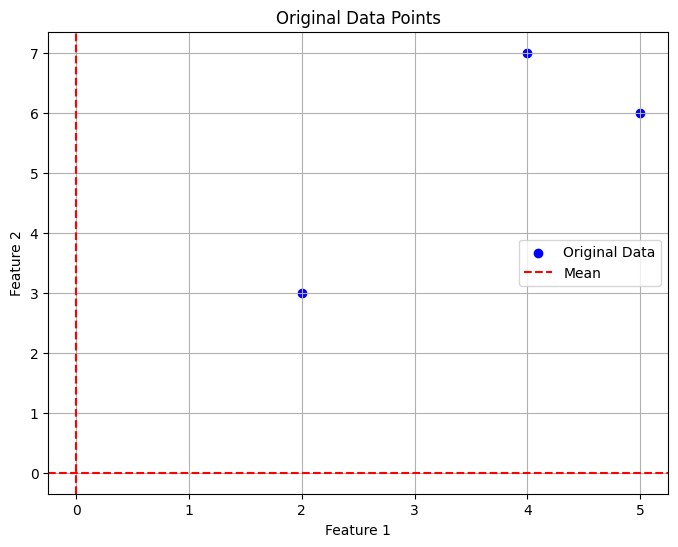

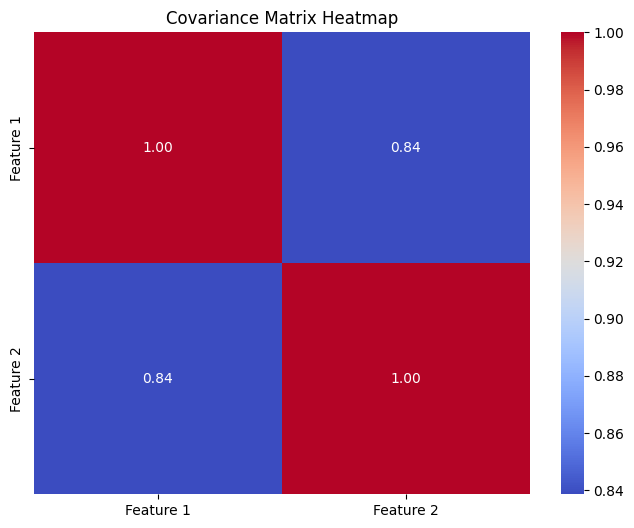

In [22]:
import seaborn as sns

# Example dataset
X = np.array([[2, 3], [4, 7], [5, 6]])
X = torch.tensor(X, dtype=torch.float32)

# # Compute mean vector
# mean_vec = np.mean(X, axis=0)
# # Standardize the data
# X_std = X - mean_vec

# # Compute covariance matrix
# m = X_std.shape[0]
# X_std_centered = X_std - mean_vec
# cov_mat = (X_std_centered.T @ X_std_centered) / (m - 1)

def compute_mean_vector(X_std):
    """
    compute mean vector
    :param X_std: transformed data
    :return n X 1 matrix: mean vector
    """
    return torch.mean(X_std, dim=0)


def compute_covariance_matrix(X_std, mean_vec):
    """
    Covariance using mean, (don't use any numpy.cov)
    :param X_std:
    :param mean_vec:
    :return n X n matrix:: covariance matrix
    """
    m = X_std.shape[0]
    X_std_centered = X_std - mean_vec
    cov_mat = (X_std_centered.T @ X_std_centered) / (m - 1)
    return cov_mat

X_std = standardize(X)
mean_vec = compute_mean_vector(X_std=X_std)
cov_mat = compute_covariance_matrix(X_std=X_std, mean_vec=mean_vec)

# Plotting the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data Points')
plt.axhline(y=mean_vec[1], color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_vec[0], color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap of the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_mat, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['Feature 1', 'Feature 2'], yticklabels=['Feature 1', 'Feature 2'])
plt.title('Covariance Matrix Heatmap')
plt.show()

### 3. Eigendecomposition
The eigendecomposition is a technique used to find the eigenvalues and eigenvectors of a matrix. The eigendecomposition is used to find the principal components of the dataset.
Eigendecomposition is a key step in PCA (Principal Component Analysis) as it helps identify the directions (principal components) in which the data varies the most. These principal components are used to reduce the dimensionality of the data while preserving as much variance as possible.

**Eigendecomposition** of a matrix is the factorization of that matrix into a set of eigenvectors and eigenvalues. For PCA, we perform eigendecomposition on the covariance matrix of the data.

Given a covariance matrix $ C $, we have:

$$ C \cdot v = \lambda \cdot v $$

Where:
- $ C $ is the covariance matrix.
- $ v $ is the eigenvector.
- $ \lambda $ is the eigenvalue.

In matrix form, the eigendecomposition can be written as:

$$ C = V \cdot \Lambda \cdot V^{-1} $$

Where:
- $ V $ is a matrix whose columns are the eigenvectors of $ C $.
- $ \Lambda $ is a diagonal matrix whose diagonal elements are the eigenvalues of $ C $.
- $ V^{-1} $ is the inverse of the matrix $ V $.

#### Why Eigendecomposition in PCA?

1. **Identifying Principal Components**: The eigenvectors represent the directions of maximum variance (principal components) in the data. The eigenvalues indicate the magnitude of the variance in these directions.

2. **Dimensionality Reduction**: By selecting the top $ k $ eigenvectors (those corresponding to the largest eigenvalues), we can transform the original data into a lower-dimensional space, capturing the most significant variance in the data.

3. **Data Reconstruction**: The principal components can be used to reconstruct the original data with reduced dimensions, maintaining most of the variance and thus the important information.

#### Example

Let's consider a simple 2D dataset:

$$ X = \begin{bmatrix} 2 & 4 \\ 3 & 6 \\ 4 & 8 \end{bmatrix} $$

1. **Compute the Covariance Matrix**:
   - First, standardize the data (assuming it is already standardized here for simplicity):
   - Compute the covariance matrix $ C $:

$$ C = \frac{1}{n-1} X^T X = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix} $$

2. **Eigendecomposition of Covariance Matrix**:
   - Find the eigenvalues and eigenvectors of $ C $:

$$ \text{Eigenvalues}: \lambda_1 = 5, \lambda_2 = 0 $$
$$ \text{Eigenvectors}: v_1 = \begin{bmatrix} 0.447 & 0.894 \end{bmatrix}, v_2 = \begin{bmatrix} -0.894 & 0.447 \end{bmatrix} $$

3. **Form the Eigenvector Matrix $ V $ and Diagonal Matrix $ \Lambda $**:

$$ V = \begin{bmatrix} 0.447 & -0.894 \\ 0.894 & 0.447 \end{bmatrix} $$
$$ \Lambda = \begin{bmatrix} 5 & 0 \\ 0 & 0 \end{bmatrix} $$

4. **Transform the Original Data**:
   - Project the original data onto the principal components (eigenvectors):

$$ X_{\text{transformed}} = X \cdot V = \begin{bmatrix} 2 & 4 \\ 3 & 6 \\ 4 & 8 \end{bmatrix} \begin{bmatrix} 0.447 & -0.894 \\ 0.894 & 0.447 \end{bmatrix} = \begin{bmatrix} 4.47 & 0 \\ 6.71 & 0 \\ 8.94 & 0 \end{bmatrix} $$

Let's visualize this toy example using Python:

#### Explanation of Visualizations

1. Original Data:
   - The scatter plot shows the mean-centered data points in blue.

2. Principal Components:
   - The red arrows represent the principal components. The length of the arrows is proportional to the eigenvalues, indicating the amount of variance captured by each principal component.
   - The first principal component (longer arrow) captures the most variance in the data, while the second principal component (shorter arrow) captures the least variance.


Eigendecomposition in PCA allows us to identify the principal components, which are the directions of maximum variance in the data. This process is essential for reducing the dimensionality of the dataset while preserving the most significant information. By projecting the data onto these principal components, we can transform the data into a lower-dimensional space, making it more manageable and interpretable.

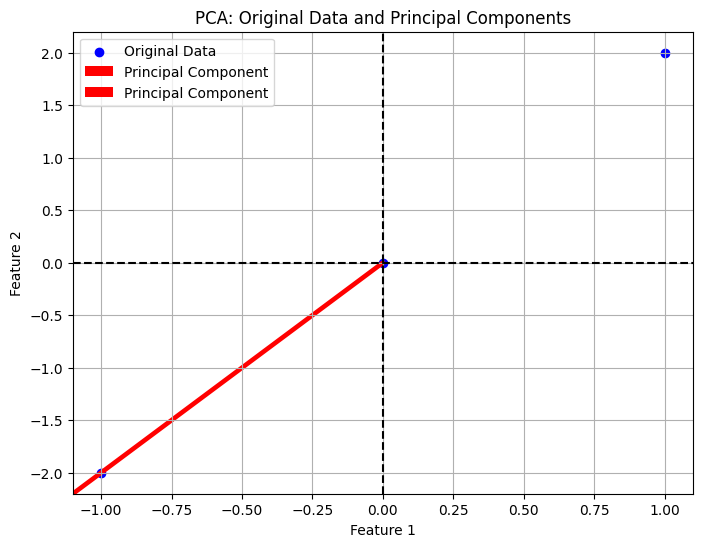

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataset
X = np.array([[2, 4], [3, 6], [4, 8]])

# Mean center the data
mean_vec = np.mean(X, axis=0)
X_centered = X - mean_vec

# Compute the covariance matrix
cov_mat = np.cov(X_centered.T)

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Project the data onto the principal components
X_transformed = X_centered.dot(eigenvectors)

# Plotting the original data and the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Original Data')
for vec, eig in zip(eigenvectors.T, eigenvalues):
    plt.quiver(0, 0, vec[0]*eig, vec[1]*eig, angles='xy', scale_units='xy', scale=1, color='red', label='Principal Component')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA: Original Data and Principal Components')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import torch
from sklearn.preprocessing import StandardScaler

class PCA:
    def __init__(self, target_explained_variance=None):
        """
        explained_variance: float, the target level of explained variance
        """
        self.target_explained_variance = target_explained_variance
        self.feature_size = -1

    def standardize(self, X):
        """
        standardize features using standard scaler
        :param X: input data with shape m (# of observations) X n (# of features)
        :return: standardized features
        """
        return (X - torch.mean(X, dim=0)) / torch.std(X, dim=0)

    def compute_mean_vector(self, X_std):
        """
        compute mean vector
        :param X_std: transformed data
        :return n X 1 matrix: mean vector
        """
        return torch.mean(X_std, dim=0)

    def compute_cov(self, X_std, mean_vec):
        """
        Covariance using mean, (don't use any numpy.cov)
        :param X_std:
        :param mean_vec:
        :return n X n matrix:: covariance matrix
        """
        m = X_std.shape[0]
        X_std_centered = X_std - mean_vec
        cov_mat = (X_std_centered.T @ X_std_centered) / (m - 1)
        return cov_mat

    def compute_eigen_vector(self, cov_mat):
        """
        Eigenvector and eigen values using PyTorch. Uses PyTorch's eigenvalue function
        :param cov_mat:
        :return: (eigen_values, eigen_vector)
        """
        eigen_values, eigen_vectors = torch.linalg.eig(cov_mat)
        # Convert complex numbers to real numbers
        eigen_values = eigen_values.real
        eigen_vectors = eigen_vectors.real
        return eigen_values, eigen_vectors

    def compute_explained_variance(self, eigen_vals):
        """
        sort eigen values and compute explained variance.
        explained variance informs the amount of information (variance)
        can be attributed to each of the principal components.
        :param eigen_vals:
        :return: explained variance.
        """
        total = torch.sum(eigen_vals)
        explained_variance = [(i / total).item() for i in sorted(eigen_vals, reverse=True)]
        return explained_variance

    def cumulative_sum(self, var_exp):
        """
        return cumulative sum of explained variance.
        :param var_exp: explained variance
        :return: cumulative explained variance
        """
        return torch.cumsum(torch.tensor(var_exp), dim=0)

    def compute_weight_matrix(self, eig_pairs, cum_var_exp):
        """
        compute weight matrix of top principal components conditioned on target
        explained variance.
        (Hint: use cumulative explained variance and target_explained_variance to find
        top components)
        
        :param eig_pairs: list of tuples containing eigenvalues and eigenvectors, 
        sorted by eigenvalues in descending order (the biggest eigenvalue and corresponding eigenvectors first).
        :param cum_var_exp: cumulative expalined variance by features
        :return: weight matrix (the shape of the weight matrix is n X k)
        """
        k = (cum_var_exp >= self.target_explained_variance).nonzero(as_tuple=True)[0][0].item() + 1
        matrix_w = torch.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(k)])
        return matrix_w

    def transform_data(self, X_std, matrix_w):
        """
        transform data to subspace using weight matrix
        :param X_std: standardized data
        :param matrix_w: weight matrix
        :return: data in the subspace
        """
        return X_std @ matrix_w

    def fit(self, X):
        """    
        entry point to the transform data to k dimensions
        standardize and compute weight matrix to transform data.
        The fit function returns the transformed features. k is the number of features which cumulative 
        explained variance ratio meets the target_explained_variance.
        :param m X n dimension: train samples
        :return m X k dimension: subspace data. 
        """
    
        self.feature_size = X.shape[1]
        
        X_std = self.standardize(X)
        mean_vec = self.compute_mean_vector(X_std)
        cov_mat = self.compute_cov(X_std, mean_vec)
        eigen_values, eigen_vectors = self.compute_eigen_vector(cov_mat)
        
        eig_pairs = [(torch.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        explained_variance = self.compute_explained_variance(eigen_values)
        cum_var_exp = self.cumulative_sum(explained_variance)
        matrix_w = self.compute_weight_matrix(eig_pairs, cum_var_exp)
        
        return self.transform_data(X_std=X_std, matrix_w=matrix_w)

# Usage Example
if __name__ == "__main__":
    # Example data
    X = torch.tensor([[2.5, 2.4],
                      [0.5, 0.7],
                      [2.2, 2.9],
                      [1.9, 2.2],
                      [3.1, 3.0],
                      [2.3, 2.7],
                      [2, 1.6],
                      [1, 1.1],
                      [1.5, 1.6],
                      [1.1, 0.9]], dtype=torch.float32)

    # Instantiate PCA with target explained variance of 95%
    pca = PCA(target_explained_variance=0.95)

    # Fit and transform the data
    X_pca = pca.fit(X)

    print("Transformed Data:")
    print(X_pca)


Transformed Data:
tensor([[ 1.0307],
        [-2.1905],
        [ 1.1782],
        [ 0.3233],
        [ 2.0722],
        [ 1.1012],
        [-0.0879],
        [-1.4061],
        [-0.5381],
        [-1.4831]])
